# IT Academy - Data Science with Python
## Sprint 6: Sampling Methods
### [Github Sampling Methods](https://github.com/jesussantana/Sampling)

[![forthebadge made-with-python](http://ForTheBadge.com/images/badges/made-with-python.svg)](https://www.python.org/)  
[![Made withJupyter](https://img.shields.io/badge/Made%20with-Jupyter-orange?style=for-the-badge&logo=Jupyter)](https://jupyter.org/try)  
[![wakatime](https://wakatime.com/badge/github/jesussantana/Sampling.svg)](https://wakatime.com/badge/github/jesussantana/Sampling)

## Create Project Structure

In [1]:
# pip install cookiecutter
# cookiecutter -c v1 https://github.com/jesussantana/cookiecutter-data-science

### Exercise 1:  

  - Grab a sports-themed dataset you like. Performs a sampling of the data generating a simple random sample and a systematic sample.

In [2]:
!pip install imblearn

import pandas as pd 
import numpy as np
from numpy import where
import random as rd
import warnings

import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import where
%matplotlib inline

from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
from collections import Counter

warnings.filterwarnings('ignore')
sns.set_theme(style='darkgrid', palette='deep')

Defaulting to user installation because normal site-packages is not writeable


In [3]:
pd.set_option('display.max_columns', None)

path = '../data/'
file = 'raw/MLB.txt'

df_raw= pd.read_table(path+file)

df = df_raw.copy()

df.head()

,player,team,position,salary
0,Brandon Webb,Arizona Diamondbacks,Pitcher,8500.0
1,Danny Haren,Arizona Diamondbacks,Pitcher,8250.0
2,Chris Snyder,Arizona Diamondbacks,Catcher,5250.0
3,Edwin Jackson,Arizona Diamondbacks,Pitcher,4600.0
4,Adam LaRoche,Arizona Diamondbacks,First Baseman,4500.0


In [4]:
df.tail()

,player,team,position,salary
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0
824,Ian Desmond,Washington Nationals,Shortstop,400.0
825,Ross Detwiler,Washington Nationals,Pitcher,400.0
826,Jesse English,Washington Nationals,Pitcher,400.0
827,Willy Taveras,Washington Nationals,Outfielder,400.0


In [5]:
df.describe().round(2)

,salary
count,828.00
mean,3281.83
std,4465.45
min,400.00
25%,418.32
50%,1093.75
75%,4250.00
max,33000.00


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 828 entries, 0 to 827
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   player    828 non-null    object 
 1   team      828 non-null    object 
 2   position  828 non-null    object 
 3   salary    828 non-null    float64
dtypes: float64(1), object(3)
memory usage: 26.0+ KB


In [7]:
df.shape

(828, 4)

In [8]:
df.columns

Index(['player', 'team', 'position', 'salary'], dtype='object')

In [9]:
# Store the real mean in a separate variable
real_mean = round(df['salary'].mean(),3)
real_mean

3281.828

### Simple Random Sample

In [10]:
simple_random_sample= df.sample(frac=0.1, replace=True, random_state=6858).sort_values(by='salary', ascending=False)

In [11]:
simple_random_sample.head()

,player,team,position,salary
79,John Lackey,Boston Red Sox,Pitcher,18700.000
768,Vernon Wells,Toronto Blue Jays,Outfielder,15687.500
552,Chase Utley,Philadelphia Phillies,Second Baseman,15285.714
27,Chipper Jones,Atlanta Braves,Third Baseman,14000.000
112,Ryan Dempster,Chicago Cubs,Pitcher,13500.000


In [12]:
simple_random_sample.shape

(83, 4)

In [13]:
simple_random_mean = round(simple_random_sample['salary'].mean(),3)
simple_random_mean

3621.331

In [14]:
real_mean

3281.828

In [15]:
abs(simple_random_sample.salary.mean()-df.salary.mean())/simple_random_sample.salary.mean()*100

9.375069863282267

In [16]:
simple_random_sample.position.value_counts(normalize=True)

Pitcher           0.542169
Outfielder        0.204819
Shortstop         0.084337
Second Baseman    0.060241
Catcher           0.060241
Third Baseman     0.024096
First Baseman     0.024096
Name: position, dtype: float64

In [17]:
df.position.value_counts(normalize=True)

Pitcher              0.495169
Outfielder           0.178744
Catcher              0.080918
Shortstop            0.067633
Second Baseman       0.057971
Third Baseman        0.055556
First Baseman        0.050725
Designated Hitter    0.008454
Infielder            0.004831
Name: position, dtype: float64

Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

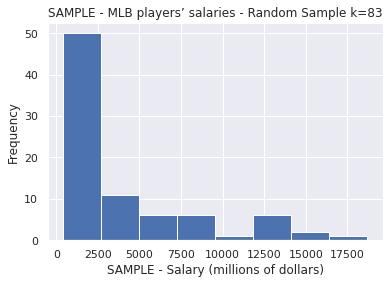

In [18]:
k = int(np.ceil(1+np.log2(len(simple_random_sample))))  # Sturges Rule

plt.hist(simple_random_sample['salary'], bins= k)
plt.title(f"SAMPLE - MLB players’ salaries - Random Sample k={len(simple_random_sample)}")
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

Text(0.5, 0, 'SAMPLE - Salary (millions of dollars)')

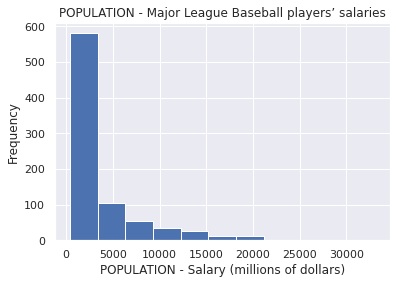

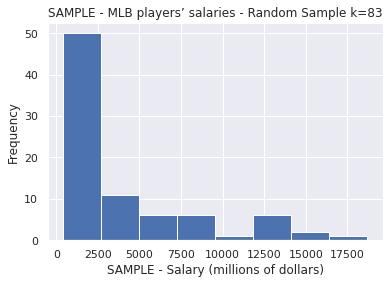

In [21]:
#fig = plt.figure(figsize=(14,4))

ax1 = fig.add_subplot(2, 1, 1)
k1 = int(np.ceil(1+np.log2(len(df))))
# Plot
ax1 = df.hist(['salary'], bins=k1)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.ylabel('Frequency')
plt.xlabel('POPULATION - Salary (millions of dollars)')

ax2 = fig.add_subplot(2, 1, 2)

# Plot
ax2 = simple_random_sample.hist(['salary'], bins=k)
plt.title(f"SAMPLE - MLB players’ salaries - Random Sample k={len(simple_random_sample)}")
plt.ylabel('Frequency')
plt.xlabel('SAMPLE - Salary (millions of dollars)')

Text(0.5, 0, 'Salary (millions of dollars)')

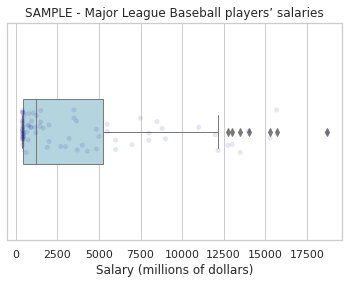

In [22]:
sns.set(style="whitegrid")
ax = sns.boxplot(x=simple_random_sample["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(x=simple_random_sample["salary"], orient='v', color='darkblue', alpha=0.1)
plt.title('SAMPLE - Major League Baseball players’ salaries')
plt.xlabel('Salary (millions of dollars)')

Text(0.5, 0, 'SAMPLE - Salary (millions of dollars) - Random Sample k=83')

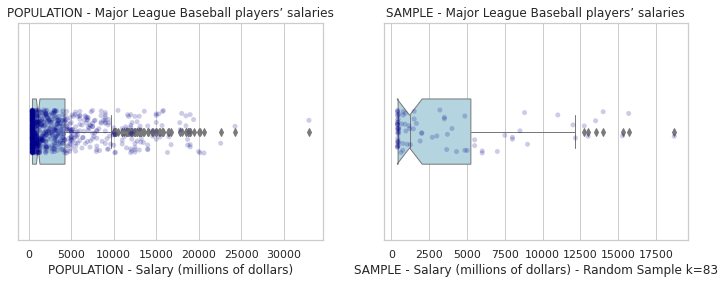

In [23]:
fig = plt.figure(figsize=(12,4))

ax1 = fig.add_subplot(1, 2, 1)

# Plot
sns.set(style="whitegrid")
ax1 = sns.boxplot(x=df["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax1 = sns.stripplot(x=df["salary"], orient='v', color='darkblue', alpha=0.2)
plt.title('POPULATION - Major League Baseball players’ salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

ax2 = fig.add_subplot(1, 2, 2)

# Plot
sns.set(style="whitegrid")
ax2 = sns.boxplot(x=simple_random_sample["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax2 = sns.stripplot(x=simple_random_sample["salary"], orient='v', color='darkblue', alpha=0.2)
plt.title('SAMPLE - Major League Baseball players’ salaries')
plt.xlabel(f'SAMPLE - Salary (millions of dollars) - Random Sample k={len(simple_random_sample)}')

In [24]:
simple_random_sample.head()

,player,team,position,salary
79,John Lackey,Boston Red Sox,Pitcher,18700.000
768,Vernon Wells,Toronto Blue Jays,Outfielder,15687.500
552,Chase Utley,Philadelphia Phillies,Second Baseman,15285.714
27,Chipper Jones,Atlanta Braves,Third Baseman,14000.000
112,Ryan Dempster,Chicago Cubs,Pitcher,13500.000


### Systematic Sampling

In [25]:
# Define systematic sampling function
def systematic_sampling(df, step):
    
    indexes = np.arange(0,len(df),step=step)
    systematic_sample = df.iloc[indexes]
    
    return systematic_sample

In [26]:
# Obtain a systematic sample and save it in a new variable
systematic_sample = systematic_sampling(df, 10).sort_values(by='salary', ascending=False)

In [27]:
# Save the sample mean in a separate variable
systematic_mean = round(systematic_sample['salary'].mean(),3)
systematic_mean

3499.42

In [28]:
real_mean

3281.828

In [29]:
# View sampled data frame
systematic_sample

,player,team,position,salary
550,Ryan Howard,Philadelphia Phillies,First Baseman,19000.0
110,Aramis Ramirez,Chicago Cubs,Third Baseman,16750.0
300,Lance Berkman,Houston Astros,First Baseman,14500.0
80,J.D. Drew,Boston Red Sox,Outfielder,14000.0
500,Jorge Posada,New York Yankees,Catcher,13100.0
...,...,...,...,...
380,Anthony Ortega,Los Angeles Angeles,Pitcher,400.0
710,Joe Mather,St. Louis Cardinals,Pitcher,400.0
270,Scott Sizemore,Detroit Tigers,Second Baseman,400.0
50,Brooks Conrad,Atlanta Braves,Second Baseman,400.0


In [30]:
systematic_sample.head()

,player,team,position,salary
550,Ryan Howard,Philadelphia Phillies,First Baseman,19000.0
110,Aramis Ramirez,Chicago Cubs,Third Baseman,16750.0
300,Lance Berkman,Houston Astros,First Baseman,14500.0
80,J.D. Drew,Boston Red Sox,Outfielder,14000.0
500,Jorge Posada,New York Yankees,Catcher,13100.0


### Cluster Sampling

In [31]:
def cluster_sampling(df, number_of_clusters):
    
    try:
        # Divide the units into cluster of equal size
        df['cluster_id'] = np.repeat([range(1,number_of_clusters+1)],len(df)/number_of_clusters)

        # Create an empty list
        indexes = []

        # Append the indexes from the clusters that meet the criteria
        # For this formula, clusters id must be an even number
        for i in range(0,len(df)):
            if df['cluster_id'].iloc[i]%2 == 0:
                indexes.append(i)
        cluster_sample = df.iloc[indexes]
        return(cluster_sample)
    
    except:
        print("The population cannot be divided into clusters of equal size!")

In [32]:
# Obtain a cluster sample and save it in a new variable
cluster_sample = cluster_sampling(df, 6)

In [33]:
# Save the sample mean in a separate variable
cluster_mean = round(cluster_sample['salary'].mean(),3)

In [34]:
# View sampled data frame
cluster_sample

,player,team,position,salary,cluster_id
138,Alex Rios,Chicago White Sox,Outfielder,10200.0,2
139,Bobby Jenks,Chicago White Sox,Pitcher,7500.0,2
140,Juan Pierre,Chicago White Sox,Outfielder,7000.0,2
141,A.J. Pierzynski,Chicago White Sox,Catcher,6750.0,2
142,Scott Linebrink,Chicago White Sox,Pitcher,5000.0,2
...,...,...,...,...,...
823,Jordan Zimmerman,Washington Nationals,Pitcher,401.0,6
824,Ian Desmond,Washington Nationals,Shortstop,400.0,6
825,Ross Detwiler,Washington Nationals,Pitcher,400.0,6
826,Jesse English,Washington Nationals,Pitcher,400.0,6


### Exercise 2: 
  - It continues with the sports theme data set and generates a stratified sample and a sample using SMOTE (Synthetic Minority Oversampling Technique).

In [35]:
systematic_sample.shape

(83, 4)

### Stratified Random Sampling

In [36]:
# Set the split criteria
split = StratifiedShuffleSplit(n_splits=1, test_size=100)

In [37]:
# Perform data frame split
for x, y in split.split(df, df['position']):
    stratified_random_sample = df.iloc[y].sort_values(by='salary')

In [38]:
type(stratified_random_sample)

pandas.core.frame.DataFrame

In [39]:
# View sampled data frame
stratified_random_sample

,player,team,position,salary,cluster_id
825,Ross Detwiler,Washington Nationals,Pitcher,400.000,6
50,Brooks Conrad,Atlanta Braves,Second Baseman,400.000,1
185,Logan Ondrusek,Cincinnati Reds,Pitcher,400.000,2
78,Matt Wieters,Baltimore Orioles,Catcher,400.000,1
77,Craig Tatum,Baltimore Orioles,Catcher,400.000,1
...,...,...,...,...,...
246,Carlos Guillen,Detroit Tigers,Outfielder,13000.000,2
135,Jake Peavy,Chicago White Sox,Pitcher,15000.000,1
383,Hiroki Kuroda,Los Angeles Dodgers,Pitcher,15433.333,3
659,Ichiro Suzuki,Seattle Mariners,Outfielder,18000.000,5


In [40]:
stratified_random_sample.groupby('position').mean()

,salary,cluster_id
position,,
Catcher,1525.375000,3.000000
Designated Hitter,11500.000000,2.000000
First Baseman,1593.444000,3.800000
Outfielder,4523.935167,3.055556
Pitcher,3106.255429,3.938776
Second Baseman,2729.283333,3.166667
Shortstop,3644.352286,3.571429
Third Baseman,4623.777667,3.333333


In [41]:
stratified_random_sample.describe().round()


,salary,cluster_id
count,100.0,100.0
mean,3349.0,4.0
std,4257.0,2.0
min,400.0,1.0
25%,434.0,2.0
50%,1375.0,4.0
75%,4312.0,5.0
max,18875.0,6.0


In [42]:
stratified_random_sample.position.unique()

array(['Pitcher', 'Second Baseman', 'Catcher', 'Outfielder',
       'Third Baseman', 'First Baseman', 'Shortstop', 'Designated Hitter'],
      dtype=object)

In [43]:
stratified_random_sample.shape

(100, 5)

In [44]:
stratified_mean = stratified_random_sample.salary.mean().round(2)
stratified_mean

3349.36

In [45]:
real_mean

3281.828

In [46]:
abs(stratified_random_sample.salary.mean()-df.salary.mean())/stratified_random_sample.salary.mean()*100


2.0163729718950014

In [47]:
stratified_random_sample.position.value_counts(normalize=True)

Pitcher              0.49
Outfielder           0.18
Catcher              0.08
Shortstop            0.07
Second Baseman       0.06
Third Baseman        0.06
First Baseman        0.05
Designated Hitter    0.01
Name: position, dtype: float64

### SMOTE (Synthetic Minority Oversampling Technique)

In [48]:
# define dataset
X, y = make_classification(n_samples=1000, n_features=2, n_redundant=0, n_clusters_per_class=1, weights=[0.99], flip_y=0, random_state=6858)

In [49]:
# summarize class distribution
counter = Counter(y)
print(counter)

Counter({0: 990, 1: 10})


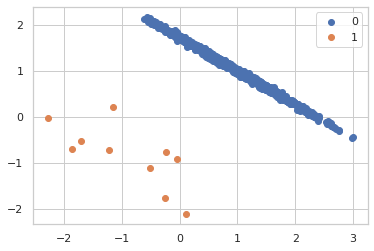

In [50]:
# scatter plot of examples by class label
for label, _ in counter.items():
	row_ix = where(y == label)[0]
	pyplot.scatter(X[row_ix, 0], X[row_ix, 1], label=str(label))
    
pyplot.legend()
pyplot.show()

## Data Summary

In [51]:
# Create a dictionary with the mean outcomes for each sampling method and the real mean
outcomes = {'sample_mean':[simple_random_mean, systematic_mean, stratified_mean, cluster_mean],'real_mean':real_mean}

# Transform dictionary into a data frame
outcomes = pd.DataFrame(outcomes, index=['Simple Random Sampling','Systematic Sampling','Stratified Sampling','Cluster Sampling'])

# Add a value corresponding to the absolute error
outcomes['abs_error'] = abs(outcomes['real_mean'] - outcomes['sample_mean'])

# Sort data frame by absolute error
outcomes.sort_values(by='abs_error')

,sample_mean,real_mean,abs_error
Stratified Sampling,3349.360,3281.828,67.532
Cluster Sampling,3135.238,3281.828,146.590
Systematic Sampling,3499.420,3281.828,217.592
Simple Random Sampling,3621.331,3281.828,339.503


Text(0.5, 0, 'SAMPLE - Salary (millions of dollars) - Random Sample k=83')

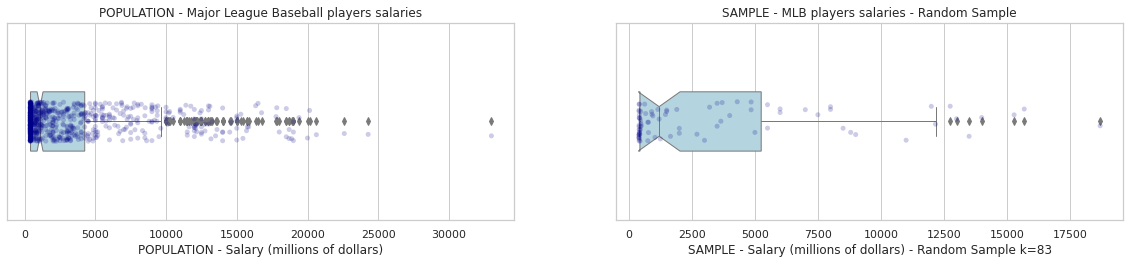

In [52]:
fig = plt.figure(figsize=(20,8))
#fig = plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

ax1 = fig.add_subplot(2, 2, 1)

# Plot
sns.set(style="whitegrid")
ax1 = sns.boxplot(x=df["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax1 = sns.stripplot(x=df["salary"], orient='v', color='darkblue', alpha=0.2)
plt.title('POPULATION - Major League Baseball players salaries')
plt.xlabel('POPULATION - Salary (millions of dollars)')

ax2 = fig.add_subplot(2, 2, 2)

# Plot
sns.set(style="whitegrid")
ax2 = sns.boxplot(x=simple_random_sample["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax2 = sns.stripplot(x=simple_random_sample["salary"], orient='v', color='darkblue', alpha=0.2)
plt.title(f'SAMPLE - MLB players salaries - Random Sample')
plt.xlabel(f'SAMPLE - Salary (millions of dollars) - Random Sample k={len(simple_random_sample)}')

Text(0.5, 0, 'Stratified - Salary (millions of dollars) - Stratified Sample k=100')

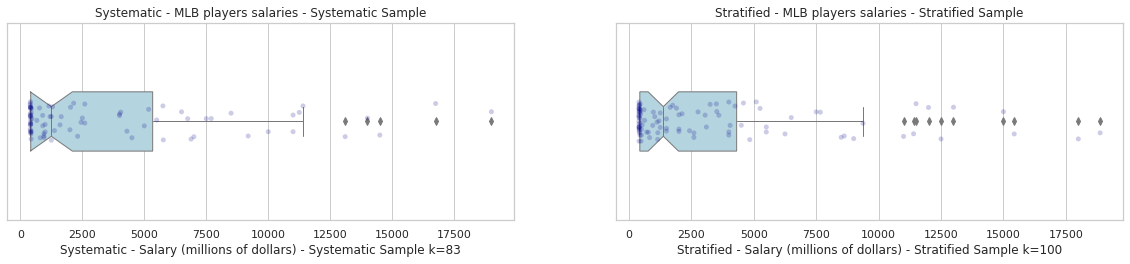

In [53]:
fig = plt.figure(figsize=(20,8))
#fig = plt.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=None, hspace=None)

ax3 = fig.add_subplot(2, 2, 1)

# Plot
sns.set(style="whitegrid")
ax3 = sns.boxplot(x=systematic_sample["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax3 = sns.stripplot(x=systematic_sample["salary"], orient='v', color='darkblue', alpha=0.2)
plt.title(f'Systematic - MLB players salaries - Systematic Sample')
plt.xlabel(f'Systematic - Salary (millions of dollars) - Systematic Sample k={len(systematic_sample)}')

ax4 = fig.add_subplot(2, 2, 2)

# Plot
sns.set(style="whitegrid")
ax4 = sns.boxplot(x=stratified_random_sample["salary"], color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3, notch=True)
ax4 = sns.stripplot(x=stratified_random_sample["salary"], orient='v', color='darkblue', alpha=0.2)
plt.title(f'Stratified - MLB players salaries - Stratified Sample')
plt.xlabel(f'Stratified - Salary (millions of dollars) - Stratified Sample k={len(stratified_random_sample)}')